In [1]:
from yahoo_finance import Share
import pandas as pd
import numpy as np
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
symbols = ["AAPL", "GOOG", "BA", "CMG", "NVDA", "RHT"]

In [3]:
data = {}
days = []
for symbol in symbols:
    share = Share(symbol)
    yesterday = (date.today() - timedelta(days=1)).strftime('%Y-%m-%d')
    prices = share.get_historical('2016-11-7', yesterday)
    close = [float(p['Close']) for p in prices]
    days = [p['Date'] for p in prices]
    data[symbol] = close
    
stocks = pd.DataFrame(data, index=days)
stocks.head()

,AAPL,BA,CMG,GOOG,NVDA,RHT
2017-02-15,135.509995,169.300003,423.339996,818.979980,109.000000,81.050003
2017-02-14,135.020004,168.500000,419.540009,820.450012,108.779999,80.089996
2017-02-13,133.289993,168.029999,414.140015,819.239990,108.379997,79.769997
2017-02-10,132.119995,166.229996,413.359985,813.669983,113.620003,79.250000
2017-02-09,132.419998,164.279999,415.309998,809.559998,116.379997,79.309998


In [4]:
change = stocks.loc['2017-02-06'] - stocks.loc['2016-11-07']
change

AAPL    19.879989
BA      20.949997
CMG     13.100006
GOOG    18.820007
NVDA    46.040001
RHT      1.550003
dtype: float64

In [5]:
pct_change = (stocks.loc['2017-02-06'] - stocks.loc['2016-11-07']) / stocks.loc['2016-11-07']
pct_change

AAPL    0.180056
BA      0.146473
CMG     0.034249
GOOG    0.024051
NVDA    0.645994
RHT     0.020217
dtype: float64

In [6]:
share_counts = np.array([500, 250, 200, 450, 100, 500])

portfolio_change = change * share_counts
portfolio_change

AAPL    9939.99450
BA      5237.49925
CMG     2620.00120
GOOG    8469.00315
NVDA    4604.00010
RHT      775.00150
dtype: float64

In [7]:
sum(portfolio_change)

31645.49969999996

In [8]:
sum(stocks.loc["2016-11-07"] * share_counts)

565056.50745000003

In [9]:
stocks.std()

AAPL     7.453845
BA       6.722646
CMG     15.689801
GOOG    21.965918
NVDA    11.686711
RHT      3.262879
dtype: float64

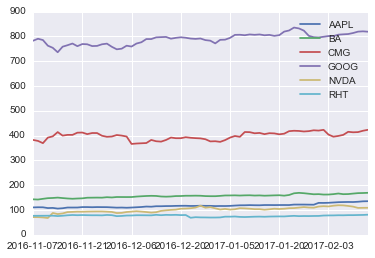

In [10]:
stocks = stocks.iloc[::-1]
stocks.plot();

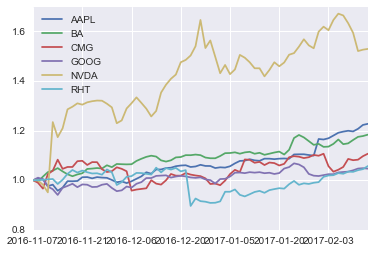

In [11]:
normalized_stocks = stocks / stocks.loc['2016-11-07']
normalized_stocks.plot();

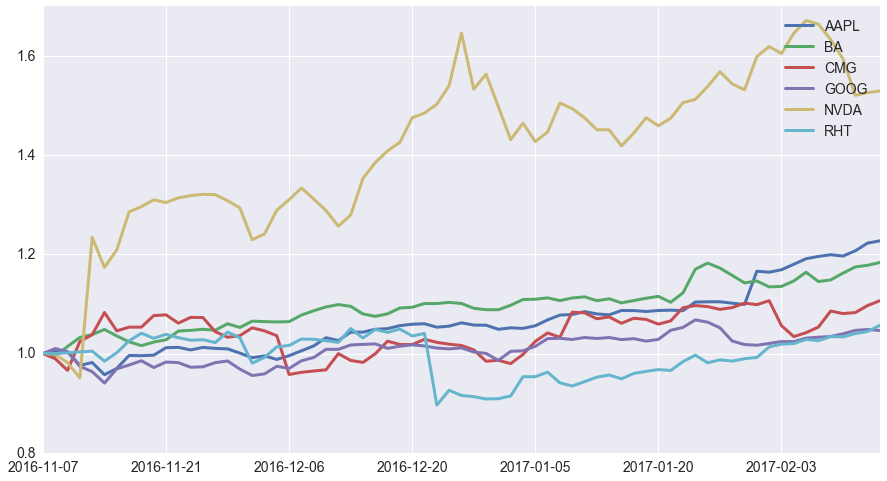

In [14]:
normalized_stocks.plot(figsize=(15,8), linewidth=3, fontsize=14)
plt.legend(fontsize=14)

In the below code, we:

- Multiply each stock price by the number of shares we hold to get the total worth of the shares we own of each symbol.
- Divide each row by the total value of the portfolio on that date to figure out what percentage of our portfolio value each stock is.
- Plot the values in an area plot, where the y axis goes from 0 to 1.
- Hide the y axis labels.

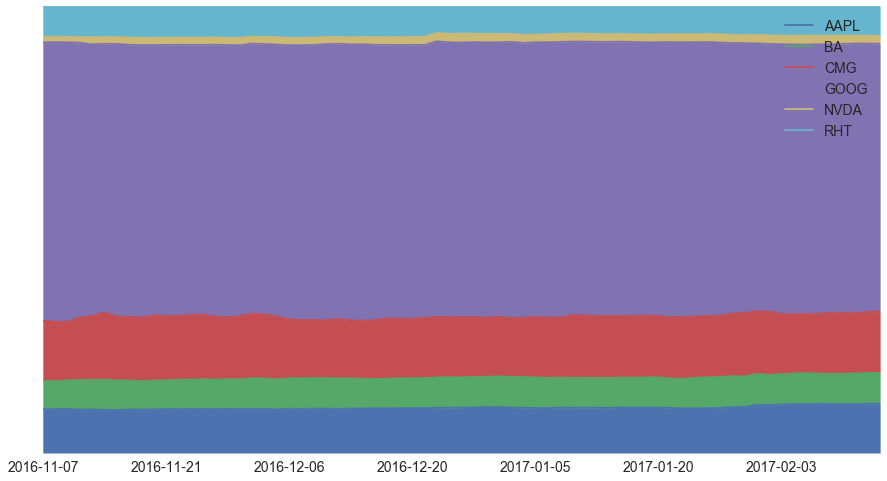

In [32]:
portfolio = stocks * share_counts
portfolio_percentages = portfolio.apply(lambda x: x/sum(x), axis=1)
portfolio_percentages.plot(kind="area", ylim=(0,1), figsize=(15,8), fontsize=14)
plt.yticks([])
plt.legend(fontsize=14);

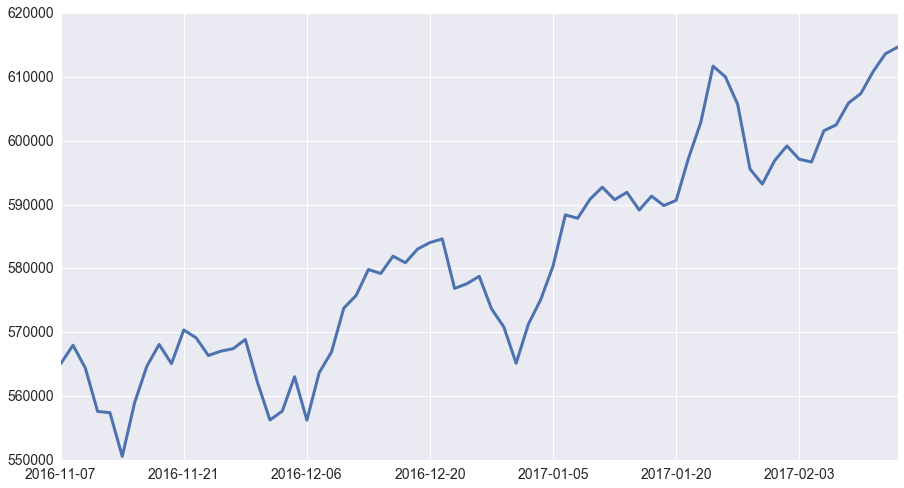

In [36]:
portfolio.sum(axis=1).plot(figsize=(15,8), fontsize=14, linewidth=3);